# Capstone Project
## IBM Data Science Professional - Capstone Project
### This notebook will mainly be used for the final capstone project

In [4]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Travel Destination Recommendation

This notebook will be used to create a program to recommend travel distinations to a client, based on a previous destination that they really enjoyed.

#### Data Importing and Cleaning

I will begin by creating a 'BeautifulSoup' object from the html file of the World's top 100 destinations for 2019.

In [5]:
#Importing the required libraries
from bs4 import BeautifulSoup
import urllib

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Top100Cities19</title>
<meta content="BCL easyConverter SDK 5.0.241" name="generator"/>
<style type="text/css">

body {margin-top: 0px;margin-left: 0px;}

#page_1 {position:relative; overflow: hidden;margin: 0px 0px 0px 0px;padding: 0px;border: none;width: 794px;height: 1123px;}
#page_1 #id1_1 {border:none;margin: 335px 0px 0px 42px;padding: 0px;border:none;width: 752px;overflow: hidden;}
#page_1 #id1_2 {border:none;margin: 558px 0px 0px 260px;padding: 0px;border:none;width: 534px;overflow: hidden;}

#page_1 #p1dimg1 {position:absolute;top:0px;left:0px;z-index:-1;width:794px;height:1123px;}
#page_1 #p1dimg1 #p1img1 {width:794px;height:1123px;}




#page_2 {position:relative; overflow: hidden;margin: 481px 0px 0px 0px;padding: 0px;border: none;width: 794px;height: 642px;}

#page_2 #p2dimg1 {position:absolute;t
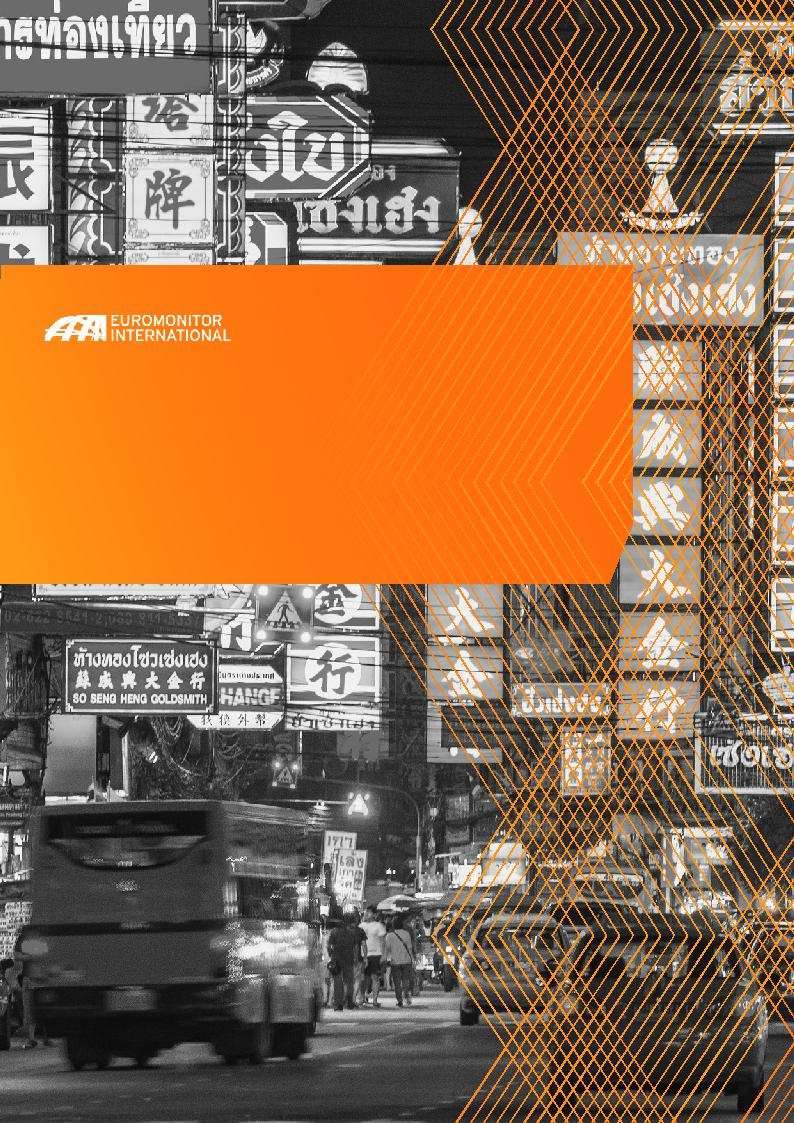
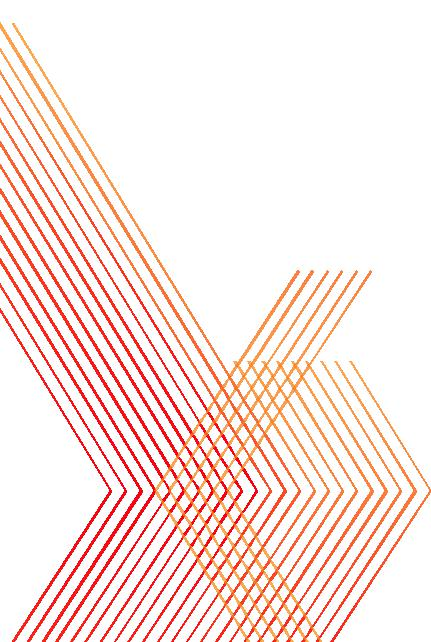
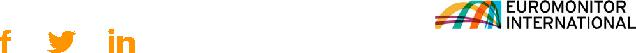
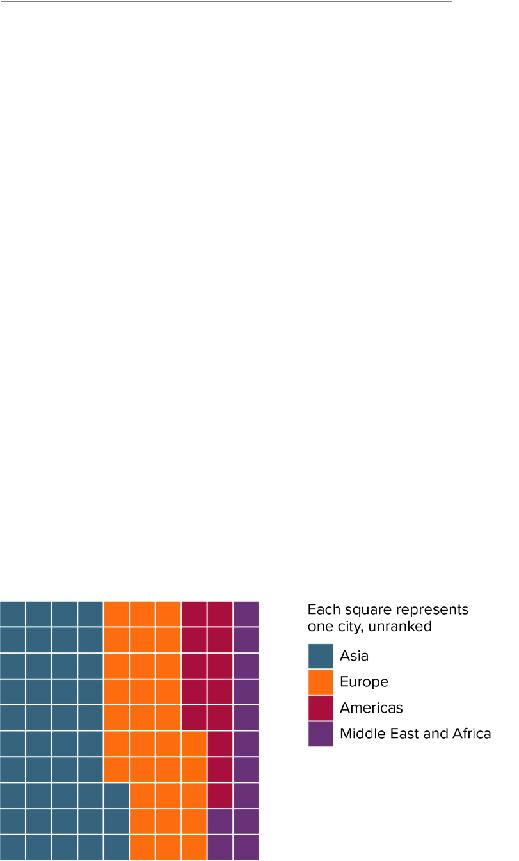
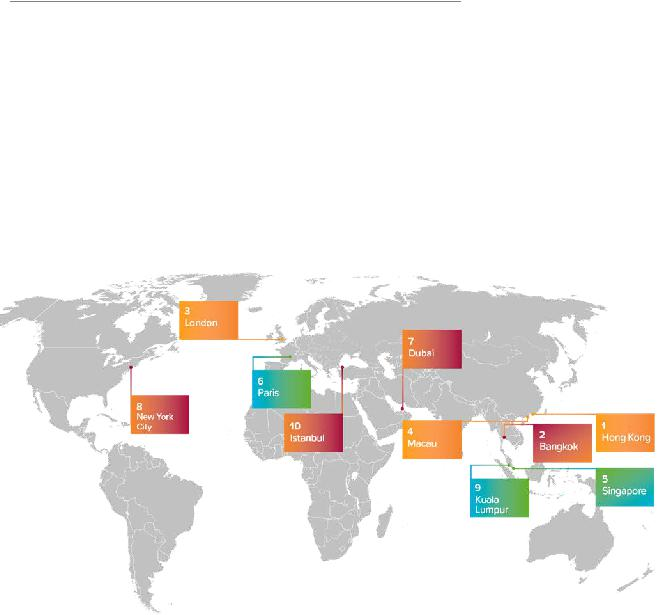
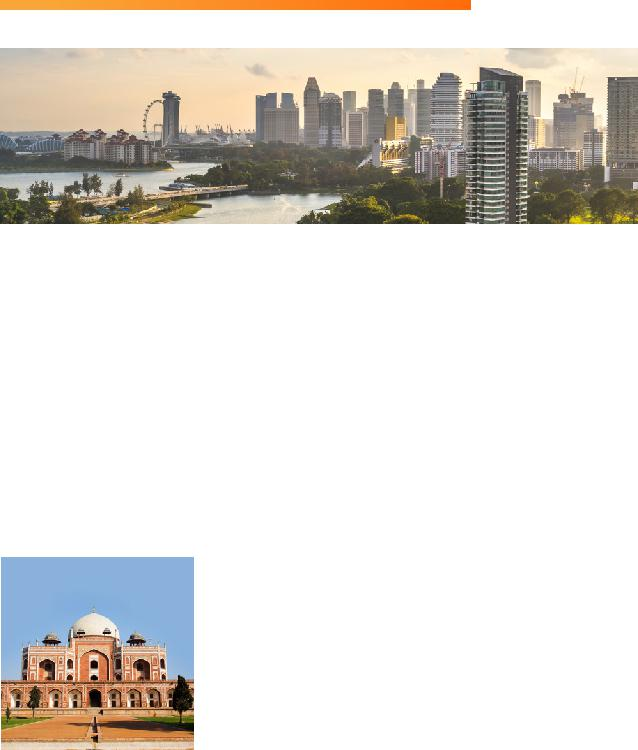
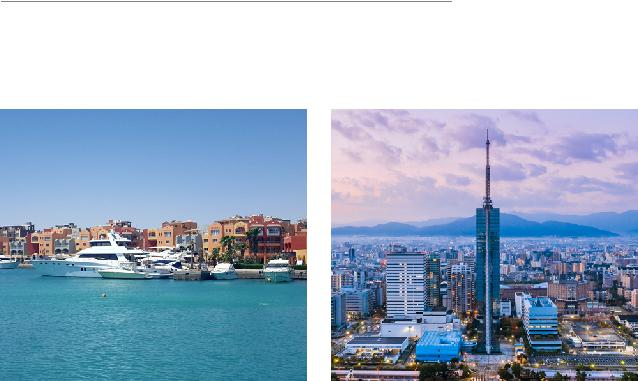
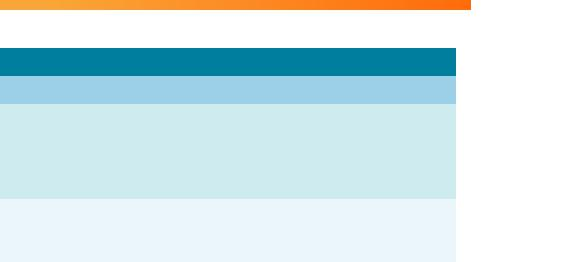
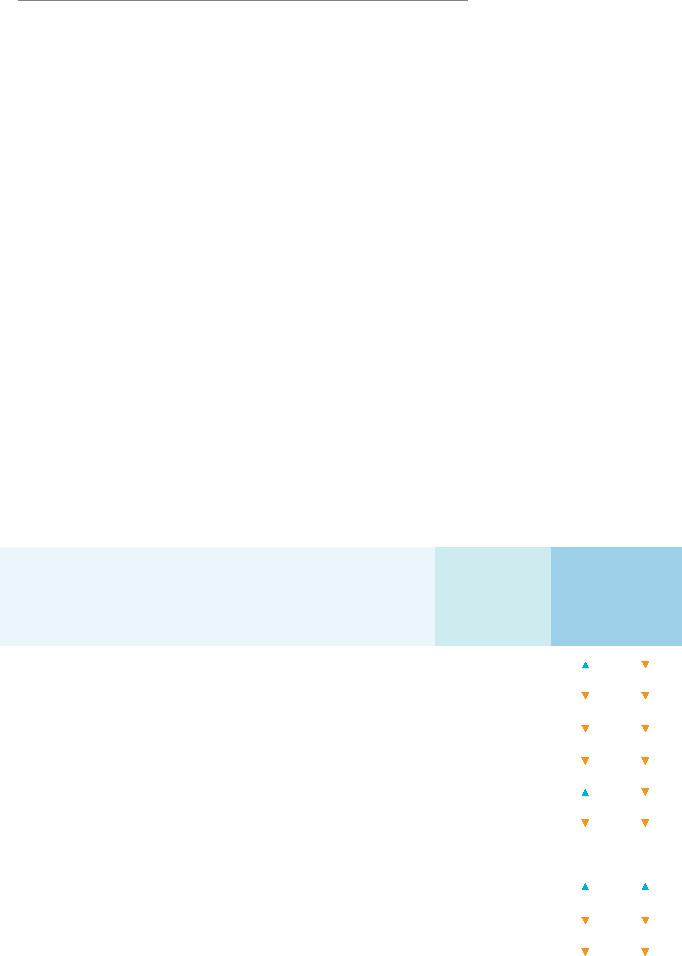
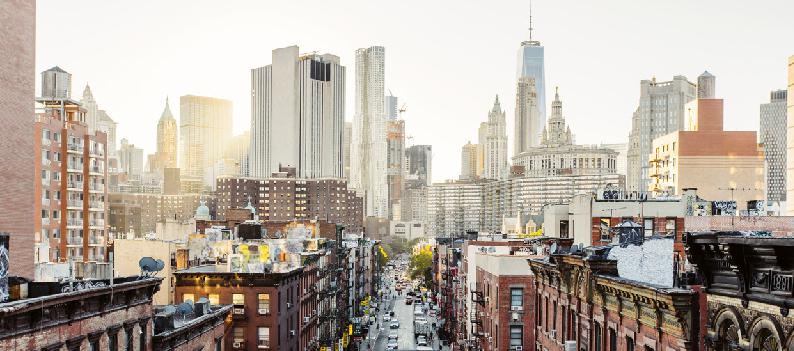
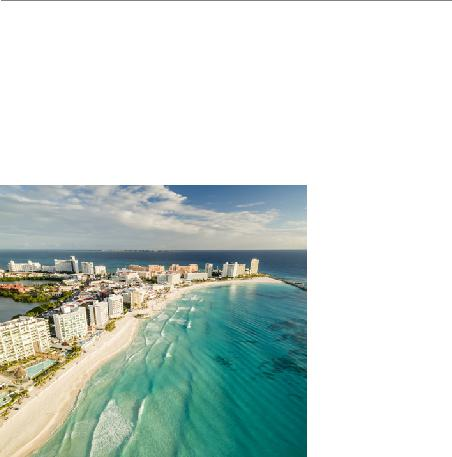
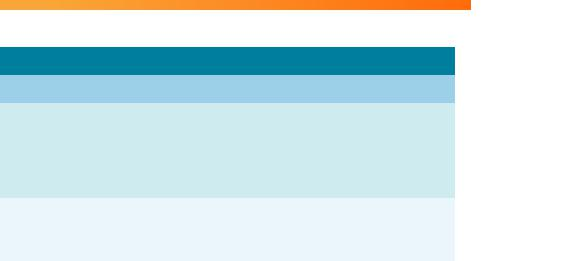
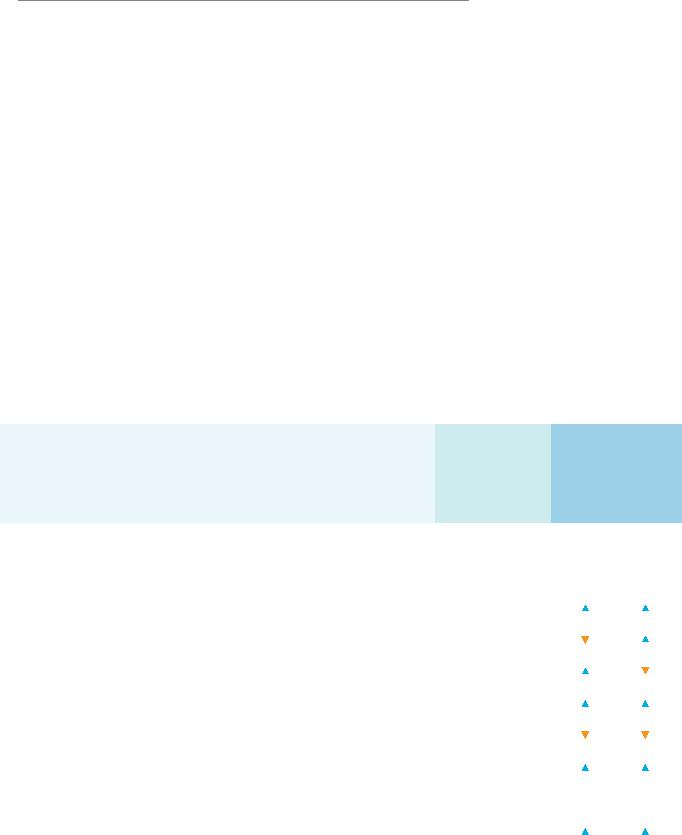
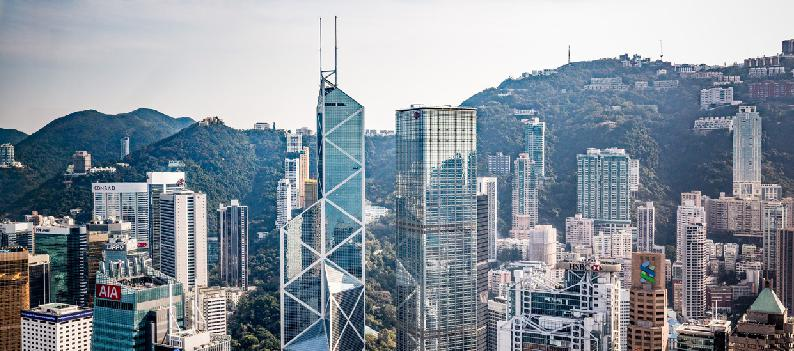
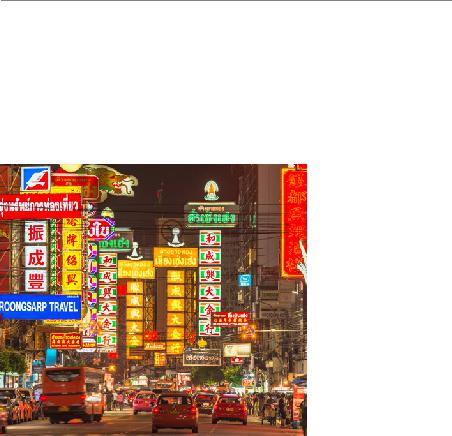
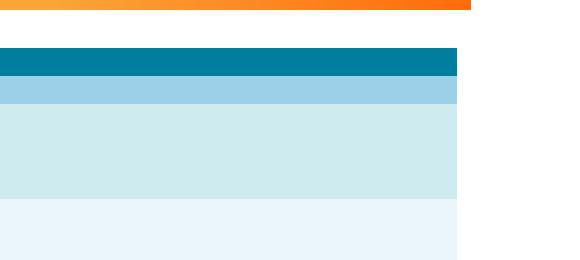
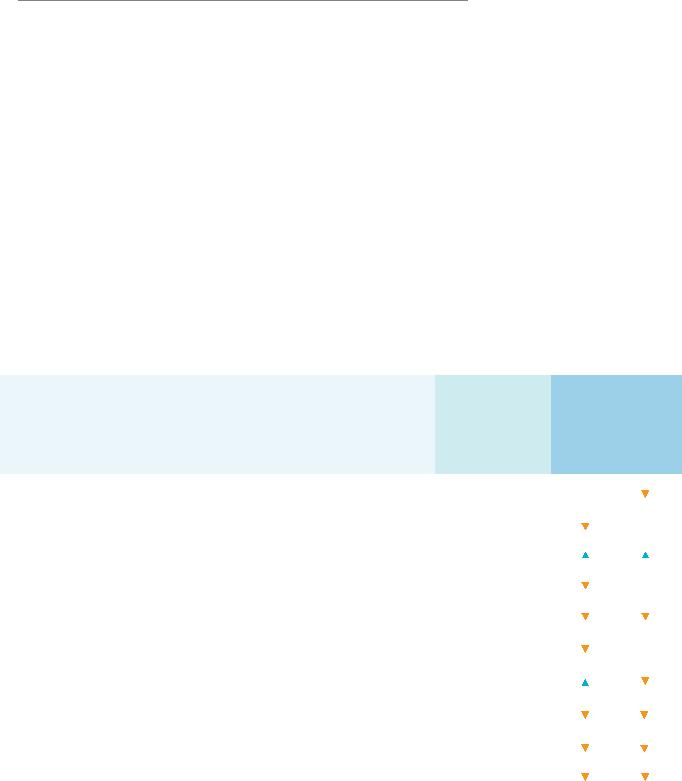
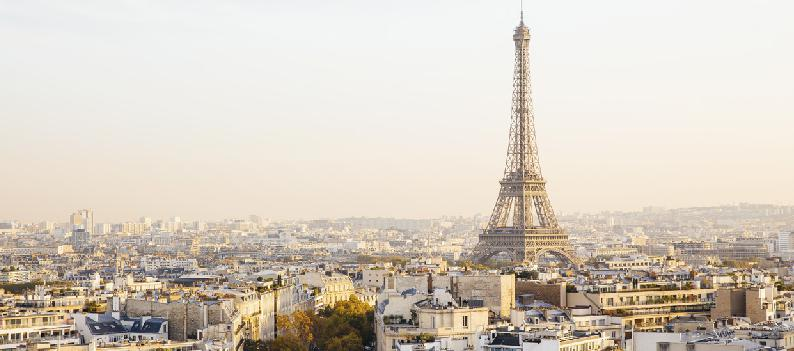
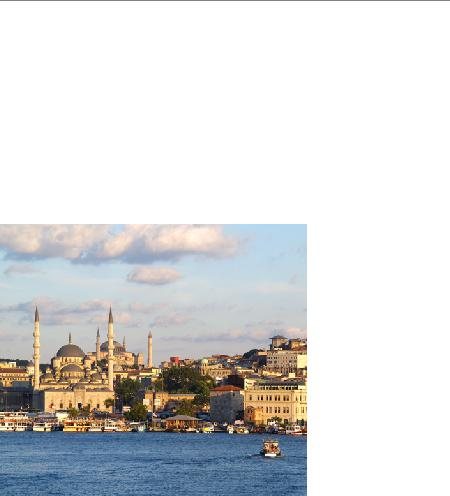
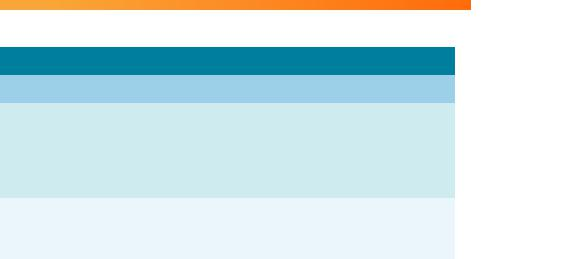
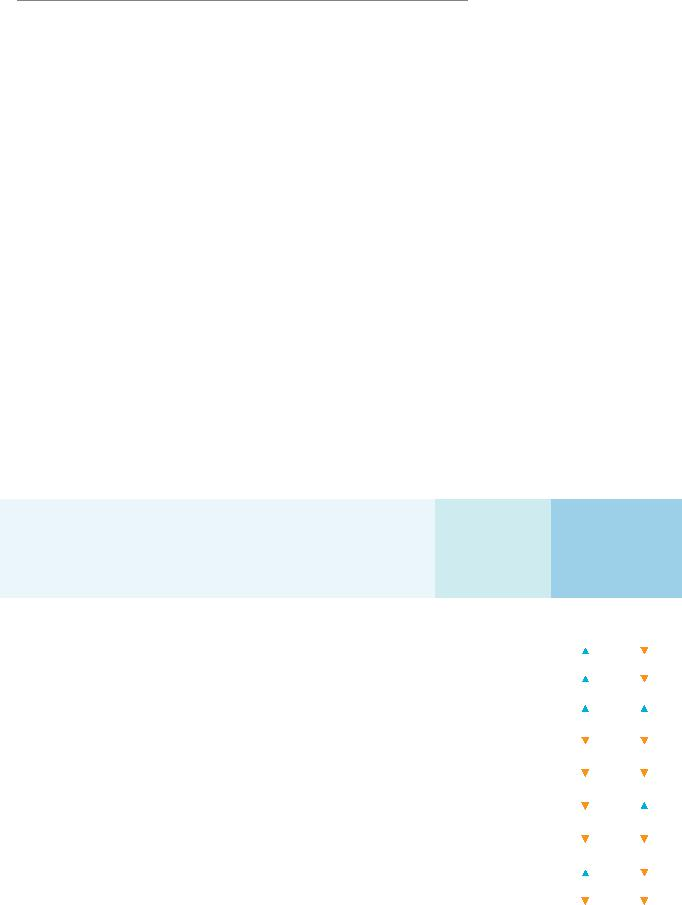
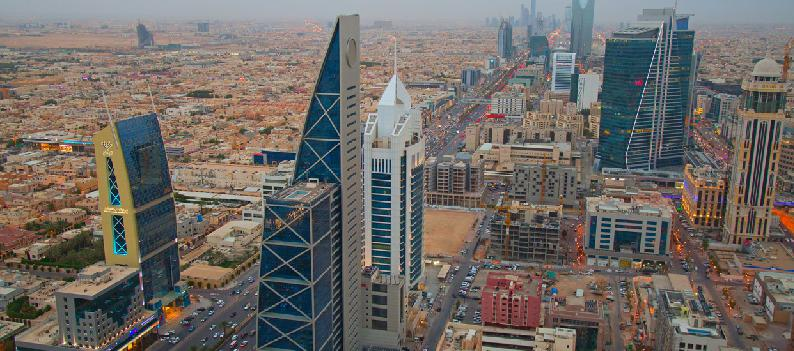
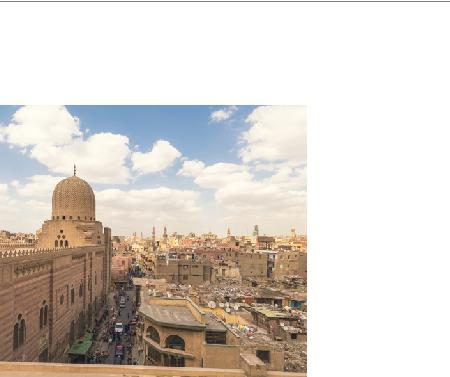
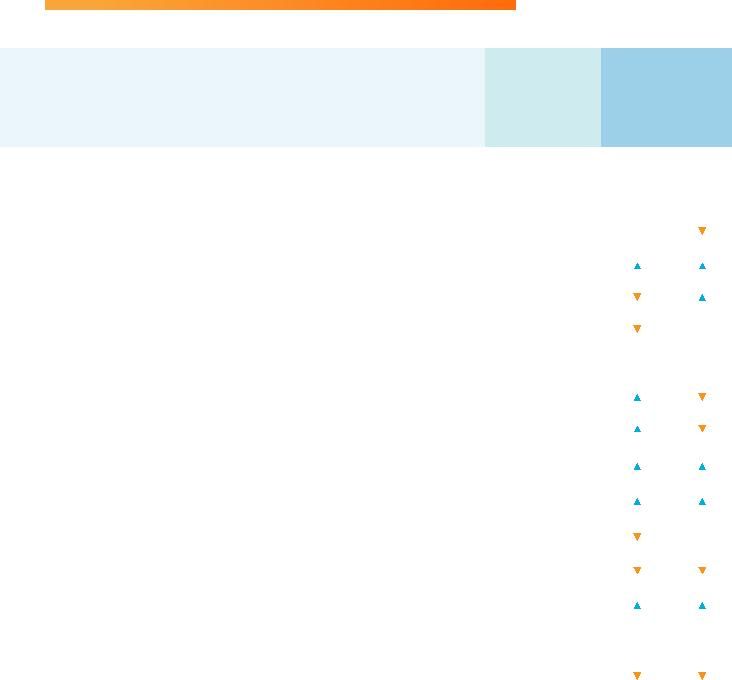
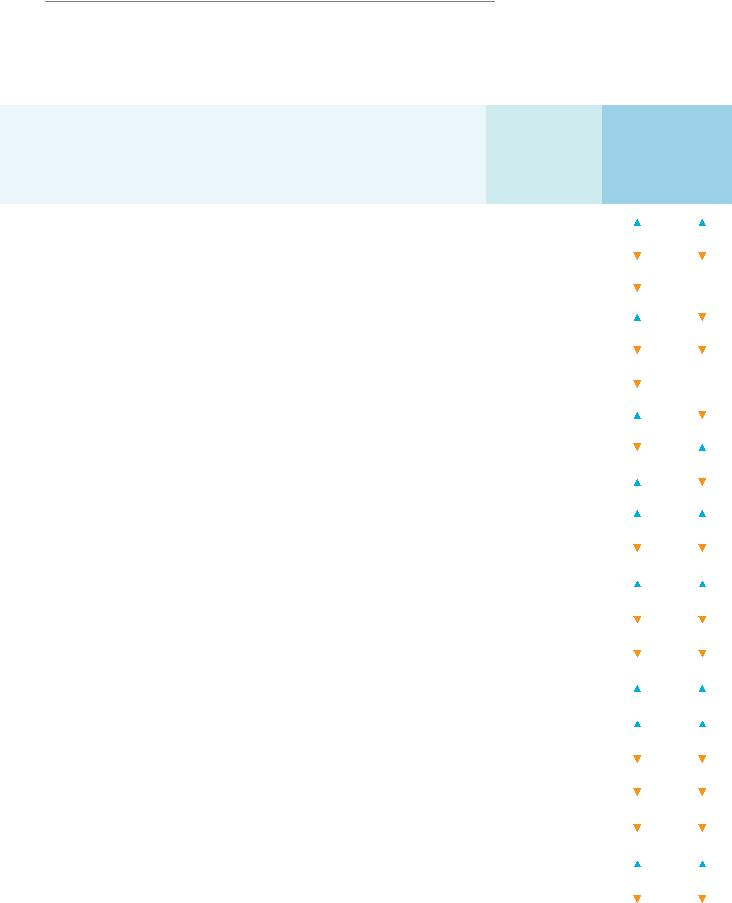
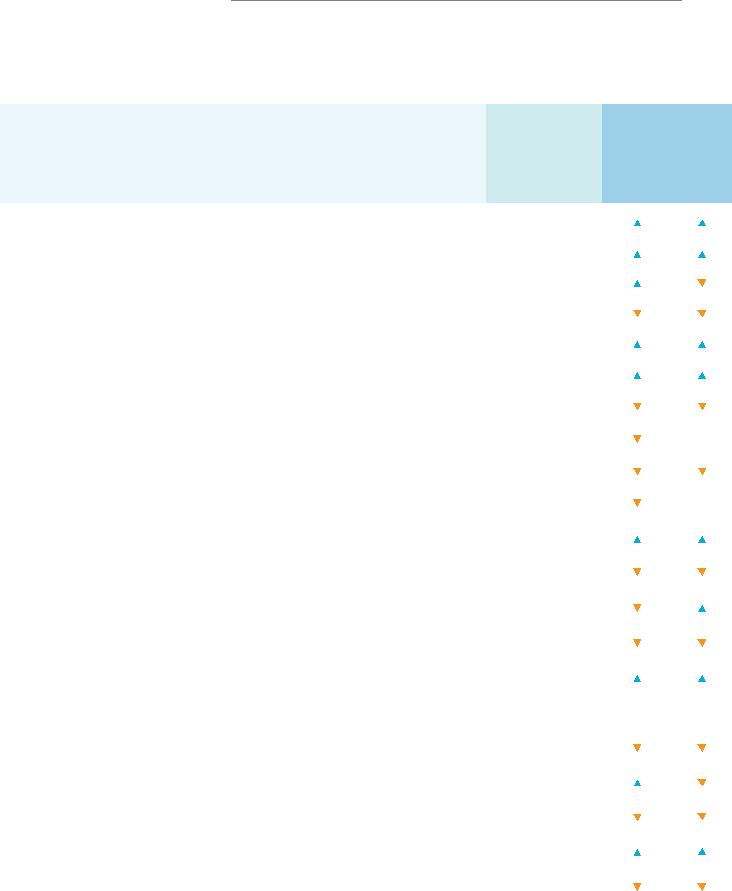
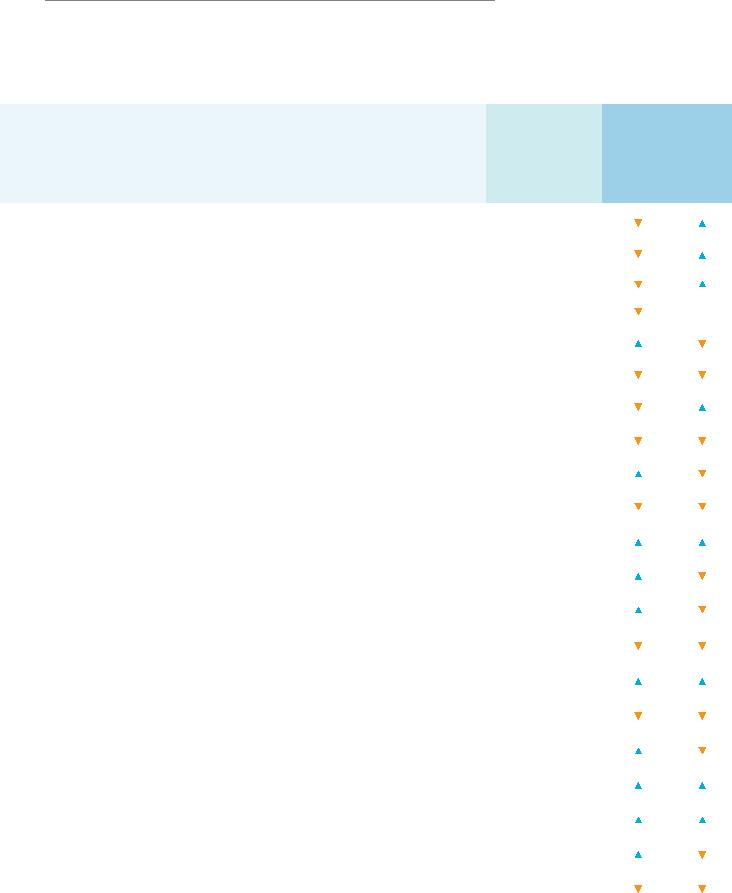
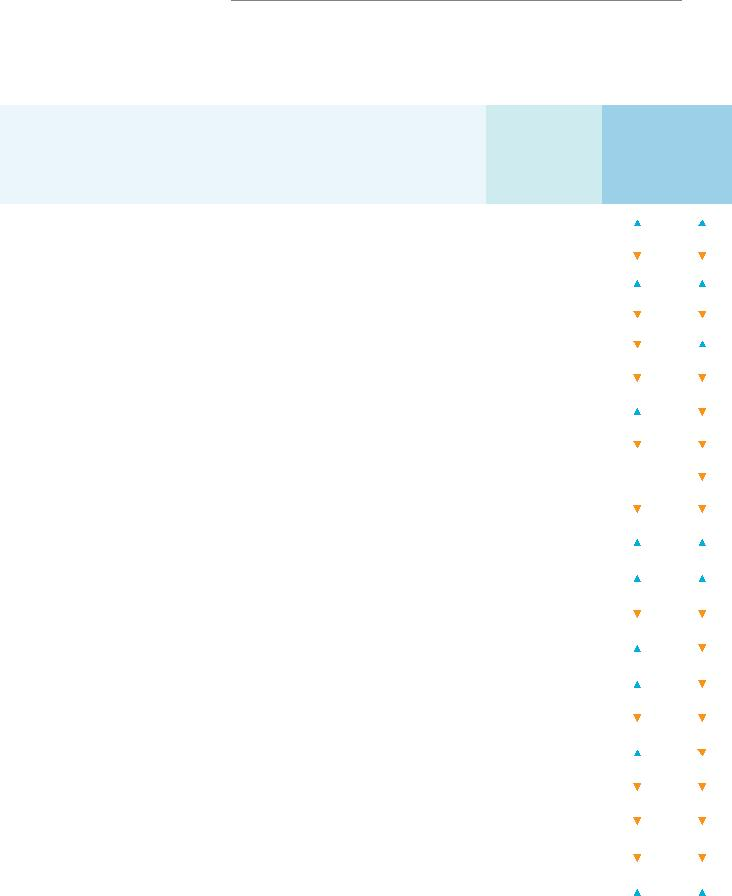
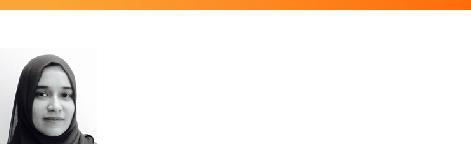
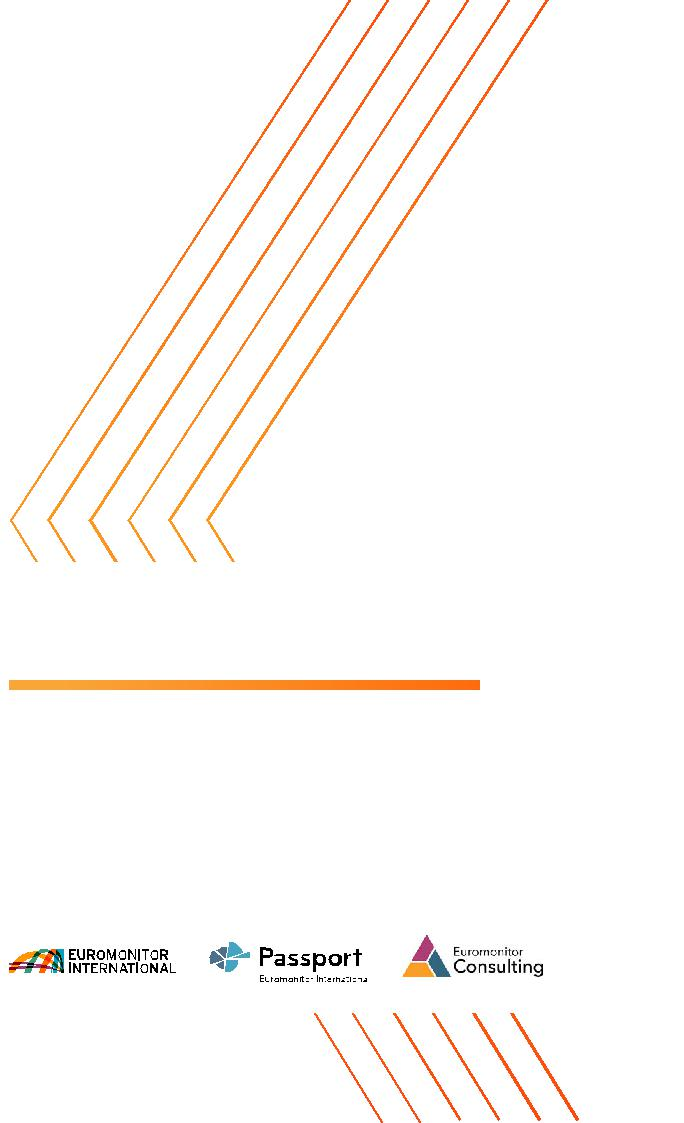

In [6]:
#Creating the BeautifulSoup Object

url = 'file:///C:/Users/alexv/Downloads/Top100Cities19.html'

html = urllib.request.urlopen(url).read()

soup = BeautifulSoup(html, 'html5lib')

soup

Here I extract the data from the desired table, I had to first create 5 dataframes since the table was split over multiple pages and the table's structure changed across the different pages and then I merged all the dataframes into 1 at the end

In [82]:
div = soup.find('div', {'id':'id27_2_1'})
contents1 = []
irow=0
for row in div.find_all('p'):
    if irow == 0:
        irow += 1
    else:
        icol = 0 
        cell ={}
        for col in row.find_all('span'):
            if icol ==0:
                rank = col.text
            else:
                city = col.text
            icol+= 1
        cell['rank'] = rank
        cell['city'] = city
        contents1.append(cell)

country = []
table = soup.find('div', {'id':'id27_2_2'})
for col in table.find_all('p'):
    c = col.text
    country.append(c)
country.pop(0)
country.pop(1)
country.pop(5)
country.pop(8)
country.pop(3)
    
df_1 = pd.DataFrame(contents1)
df_1['country'] = country
df_1 = df_1[['rank','city','country']]
df_1['country'].replace({'Hong Kong,':'Hong Kong, China',
                         'United':'United Kingdom',
                         'Macau,':'Macau, China',
                         'United Arab':'United Arab Emirates'}, inplace=True)


div = soup.find('div', {'id':'id28_1'})
contents2 = []
irow=0
for row in div.find_all('tr'):
    irow += 1
    if irow in [1,2] or len(row)<10:
        pass
    else:
        icol = 0
        cell = {}
        while icol <= 3:
            for col in row.find_all('td'):
                if icol ==1:
                    rank = col.p.text
                elif icol ==2:
                    city = col.p.text
                elif icol ==3:
                    country = col.p.text
                icol += 1
        cell['rank'] = rank
        cell['city'] = city
        cell['country'] = country
        contents2.append(cell)
                
            
df_2 = pd.DataFrame(contents2)
df_2.drop(index=[3,7,17],inplace=True)
df_2.reset_index(inplace=True)
df_2 = df_2[['rank','city','country']]               
df_2['country'].replace({'Taiwan,':'Taiwan, China'},inplace=True)


div = soup.find('div', {'id':'id29_1'})
contents3 = []
irow=0
for row in div.find_all('tr'):
    irow += 1
    if irow in [1,2]:
        pass
    else:
        icol = 0
        cell = {}
        while icol <= 2:
            for col in row.find_all('td'):
                if icol ==0:
                    rank = col.p.text
                elif icol ==1:
                    city = col.p.text
                elif icol ==2:
                    country = col.p.text
                icol += 1
        cell['rank'] = rank
        cell['city'] = city
        cell['country'] = country
        contents3.append(cell)
                
            
df_3 = pd.DataFrame(contents3)   
df_3.drop(index=[3,7,17],inplace=True)
df_3.reset_index(inplace=True)
df_3 = df_3[['rank','city','country']]
df_3_1 = pd.DataFrame([{'rank':'41','city':'Berlin','country':'Germany'},
                       {'rank':'45','city':'Moscow','country':'Russia'},
                       {'rank':'55','city':'Sydney','country':'Australia'}])[['rank','city','country']]


div = soup.find('div', {'id':'id30_2_1'})
contents4 = []
irow=0
for row in div.find_all('p'):
    icol = 0 
    cell ={}
    for col in row.find_all('span'):
        if icol ==0:
            rank = col.text
        else:
            city = col.text
        icol+= 1
        
    cell['rank'] = rank
    cell['city'] = city
    contents4.append(cell)

country = []
table = soup.find('div', {'id':'id30_2_2'})
for row in table.find_all('tr'):
    icol = 0
    while icol <= 1:  
        for col in row.find_all('td'):
            if icol ==0:
                pass
            elif icol == 1:
                c = col.p.text
            icol += 1
    country.append(c)

country.pop(-3)
country.pop(-2)
df_4 = pd.DataFrame(contents4)
df_4['country'] = country
df_4 = df_4[['rank','city','country']]
df_4['country'].replace({'New Zea-':'New Zealand'},inplace=True)


div = soup.find('div', {'id':'id31_1'})
contents5 = []
irow=0
for row in div.find_all('tr'):
    irow += 1
    if irow in [1,2] or len(row)<10:
        pass
    else:
        icol = 0
        cell = {}
        while icol <= 3:
            for col in row.find_all('td'):
                if icol ==1:
                    rank = col.p.text
                elif icol ==2:
                    city = col.p.text
                elif icol ==3:
                    country = col.p.text
                icol += 1
        cell['rank'] = rank
        cell['city'] = city
        cell['country'] = country
        contents5.append(cell)
                
            
df_5 = pd.DataFrame(contents5)   
df_5.drop(index=[6,16,21],inplace=True)
df_5.reset_index(inplace=True)
df_5 = df_5[['rank','city','country']]

dataframes = [df_1, df_2, df_3, df_3_1, df_4, df_5]
top100_df = pd.concat(dataframes)
top100_df['rank'] = top100_df['rank'].astype(int)
top100_df = top100_df.sort_values('rank').reset_index(drop=True)
top100_df['country'].replace({'US':'USA'}, inplace=True)
top100_df['city'].replace({'Buenos':'Buenos Aires City','Rio de':'Rio de Janeiro'}, inplace=True)
top100_df.to_csv('top100_df.csv', index=False)
top100_df.head(10)

rank           city               country
0     1      Hong Kong      Hong Kong, China
1     2        Bangkok              Thailand
2     3         London        United Kingdom
3     4          Macau          Macau, China
4     5      Singapore             Singapore
5     6          Paris                France
6     7          Dubai  United Arab Emirates
7     8  New York City                   USA
8     9   Kuala Lumpur              Malaysia
9    10       Istanbul                Turkey

In [83]:
top100_df.tail(18)

rank               city      country
82    83             Warsaw       Poland
83    84              Mugla       Turkey
84    85  Buenos Aires City    Argentina
85    86              Chiba        Japan
86    87          Frankfurt      Germany
87    88          Stockholm       Sweden
88    89               Lima         Peru
89    90            Da Nang      Vietnam
90    91              Batam    Indonesia
91    92               Nice       France
92    93            Fukuoka        Japan
93    94          Abu Dhabi  United Arab
94    95               Jeju  South Korea
95    96              Porto     Portugal
96    97             Rhodes       Greece
97    98     Rio de Janeiro       Brazil
98    99              Krabi     Thailand
99   100          Bangalore        India

Now I need to retrieve the coordinates of each city using the geocoder library and merge this data with my top100_df dataframe

In [17]:
import geocoder

lat = []
long = []

for city, country in zip(top100_df['city'], top100_df['country']):
    print('retrieving coordinates for {}, {}'.format(city, country))
    coords = None
    while (coords is None):
        g = geocoder.google('{}, {}'.format(city, country))
        coords = g.latlng
    lat.append(coords[0])
    long.append(coords[1])

top100_df['latitude'] = lat
top100_df['longitude'] = long

top100_df

retrieving coordinates for Hong Kong, Hong Kong, China


KeyboardInterrupt: 

Since the geocoder would not run properly, I dowloaded my top100_df as a csv file and loaded it into the 'Skill Network Labs' environment where I was able to use the geopy library to retrieve the coordinate data, which I the saved to another csv file and imported that file back into this notebook

In [84]:
top100_df = pd.read_csv('top100_geospatial.csv')
top100_df.head()

rank       city           country   latitude   longitude
0     1  Hong Kong  Hong Kong, China  22.279328  114.162813
1     2    Bangkok          Thailand  13.754424  100.493040
2     3     London    United Kingdom  51.507322   -0.127647
3     4      Macau      Macau, China  22.189945  113.538045
4     5  Singapore         Singapore   1.357107  103.819499

Here, I collect venue data for each city using the Foursquare AIP

In [153]:
#import the required libraries
import requests
import json

#my foursquare credentials
CLIENT_ID = 'QMDWTNEPHUORERIL1RGVZD0WVOUMOPXVCT4J0RJYGH4LO233'
CLIENT_SECRET = 'UBFU2XT2ED334MXQTMF34SRXZ3JRW1SQZJH02CF0TI4TABSC'
VERSION = '20180604'
LIMIT = 250

#define a function to retrieve nearby venues for each city
def getVenues(cities, lats, longs, rad=7500):
    venues = []
    
    for city, lat, long in zip(cities, lats, longs):
        url = ('https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.
                format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, long, rad, LIMIT))
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues.append([(city, lat, long,
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
    
    city_venues = pd.DataFrame([item for venue in venues for item in venue])
    city_venues.columns = ['city', 'latitude', 'longitude', 'venue', 'v_lat', 'v_long','category']
    return city_venues

#Call the function
city_venues = getVenues(top100_df['city'], top100_df['latitude'], top100_df['longitude'])
city_venues.shape

(9191, 7)

In [154]:
print(len(city_venues['category'].unique()))
city_venues['category'].unique()

503


array(['Zoo', 'Park', 'Hotel', 'Non-Profit', 'Steakhouse',
       'Gym / Fitness Center', 'Dim Sum Restaurant', 'Cupcake Shop',
       'Shopping Mall', 'Italian Restaurant', 'Pakistani Restaurant',
       'Bakery', 'Cantonese Restaurant', 'Japanese Restaurant',
       'Yoga Studio', 'Speakeasy', 'Athletics & Sports', 'Supermarket',
       'Electronics Store', 'Nightclub', 'Lounge', 'Art Museum',
       'Hotel Bar', 'Thai Restaurant', 'Dumpling Restaurant',
       'Chinese Restaurant', 'Massage Studio', 'Bookstore', 'Café',
       'French Restaurant', 'Shanghai Restaurant', 'Bar', 'Wine Bar',
       'Scenic Lookout', 'Cosmetics Shop', 'Arts & Crafts Store',
       'Cocktail Bar', 'Vegetarian / Vegan Restaurant',
       'Indian Restaurant', 'Dessert Shop', 'Performing Arts Venue',
       'Trail', 'Scandinavian Restaurant', 'Art Gallery', 'BBQ Joint',
       'Bistro', 'Juice Bar', 'Beer Store', 'Vietnamese Restaurant',
       'Coffee Shop', 'Gourmet Shop', 'Wine Shop', 'Restaurant',
     

In the next 2 cells, I curated 3 different lists. 

In the first list I stored the names of all the categories that either a) are of no concern to a tourist or b) are too ambiguous and would be found in all destinations and/or c) are categories that would have a high frequency and would push down the proportional frequency of more relevant venue categories to tourists

In the second list I added most of the venues that were sports related, since most cities will only have 1 soccer stadium for example, which would make the category's proportional frequency very lower, so I combined them all into 1 category later in order to increase the categorys' proportional frequency

In the third list I added all the location categories that would be considered akin to a bar or club in order to form 1 group for these categories so that they are not seperate categories, each with frequencies higher than competing categories.

In [134]:
discard_venues = ['Hotel','Non-Profit','Steakhouse','Cupcake Shop','Bakery','Supermarket','Bookstore','Cosmetics Shop','Arts & Crafts Store',
 'Beer Store','Restaurant','Café','Coffee Shop','Dessert Shop','Ice Cream Shop','Breakfast Spot','Buffet','Food & Drink Shop',
  'Multiplex', 'Grocery Store','Food Court','Resort','Bridge','Reservoir','Dog Run','Pet Service','Snack Place','Butcher',
'College Cafeteria','Furniture / Home Store','Bubble Tea Shop', 'Toy / Game Store', 'Burger Joint','Sandwich Place', 'Comic Shop',
'Dance Studio', 'Tea Room','Flower Shop','Frozen Yogurt Shop', 'Record Shop','Neighborhood','Hotel Pool','Gym Pool', 
 'Duty-free Shop','Comfort Food Restaurant','Paper / Office Supplies Store', 'Shoe Store','Stationery Store','Cycle Studio',
 'Track','IT Services','Building', 'Lingerie Store','Video Store', 'Music Store','Sporting Goods Shop','Food Truck',
'Fast Food Restaurant','Motorcycle Shop', 'Gym','Food', 'Advertising Agency', 'Pie Shop', 'Miscellaneous Shop','Veterinarian',
'Mobile Phone Shop','Candy Store', 'Gas Station','Movie Theater', 'Airport Service','Salad Place','Donut Shop','Gaming Cafe', 
 'Convenience Store','Diner', 'Accessories Store','Pet Store', 'Bed & Breakfast','Climbing Gym','Warehouse Store','Soup Place',
'Recording Studio', 'Road', 'Hill','Hot Dog Joint','Gelato Shop', 'Camera Store', 'Cemetery', 'Dairy Store','Pharmacy', 
 'Discount Store','Design Studio','Airport','Residential Building (Apartment / Condo)','Hardware Store','Hobby Shop',
'Home Service','Office', 'High School','Kids Store','Outlet Mall', 'English Restaurant','Kitchen Supply Store','Nail Salon', 
 'Liquor Store','Drugstore','Used Bookstore','Fabric Shop','Film Studio', 'Stables', 'Boxing Gym', 'City Hall','Perfume Shop',
'Music School','Health Food Store', 'Fruit & Vegetable Store','Optical Shop', 'Photography Studio', 'Herbs & Spices Store',
'Community Center','Bank','Board Shop', 'Coffee Roaster',"Women's Store",'Food Stand','Rental Car Location','Bus Station', 
 'Border Crossing','Disc Golf', 'Financial or Legal Service','Cafeteria','College Library', 'Martial Arts School',
'Food Service', 'Housing Development','Intersection','Rest Area', 'Tourist Information Center','Bistro']
print('{} categories were removed'.format(len(discard_venues)))

139 categories were removed


In [105]:
sport_venues = ['Golf Course','Tennis Stadium','Volleyball Court','Soccer Stadium','Tennis Court','Stadium','Cricket Ground','Surf Sport',
'Racetrack','Rock Climbing Spot','Pool Hall','Skate Park','Basketball Stadium','Baseball Stadium','Gymnastics Gym',
'Laser Tag','Bike Rental / Bike Share','Sports Club','Water Park','Motel','Badminton Court','Hockey Arena','Dive Spot',
'Go Kart Track','Bike Trail']
print('{} sporting related categories were combined into a single category'.format(len(sport_venues)))

25 sporting related categories were combined into a single category


In [124]:
like_bar = city_venues[city_venues['category'].str.contains('Bar')]
for excl in ['Juice','Salon','Karaoke','Hookah']:
    like_bar = like_bar[~like_bar['category'].str.contains(excl)]
like_bar = list(like_bar['category'].unique())
like_bar.append('Pub')

like_club = city_venues[city_venues['category'].str.contains('Club')]
for excl in ['House','Comedy']:
    like_club = like_club[~like_club['category'].str.contains(excl)]
like_club = list(like_club['category'].unique())
like_club.append('Nightclub')

nightlife = like_bar + like_club
print('{} nightlife related categories were combined into a single category'.format(len(nightlife)))

17 nightlife related categories were combined into a single category


Removing the venues that fall into the 'discard' venues list and combining the different sports and nightlife categories into single categories respectively

In [155]:
city_venues = city_venues[~city_venues['category'].isin(discard_venues)]
for sport_venue in sport_venues: 
    city_venues['category'].replace({sport_venue:'Sports Venue'},inplace=True)
for night in nightlife:
    city_venues['category'].replace({night:'Nightlife'},inplace=True)
print(city_venues.shape)
(city_venues['category'].unique()=='Sports Venue').sum()

(5470, 7)


1

In [156]:
city_venues.head()

city   latitude   longitude                            venue  \
0   Hong Kong  22.279328  114.162813  Hong Kong Park Aviary (香港公園觀鳥園)   
1   Hong Kong  22.279328  114.162813            Hong Kong Park (香港公園)   
8   Hong Kong  22.279328  114.162813                     Pure Fitness   
9   Hong Kong  22.279328  114.162813                   Mott 32 (卅二公館)   
12  Hong Kong  22.279328  114.162813             Pacific Place (太古廣場)   

        v_lat      v_long              category  
0   22.277140  114.161399                   Zoo  
1   22.277700  114.161854                  Park  
8   22.278475  114.161363  Gym / Fitness Center  
9   22.280286  114.159080    Dim Sum Restaurant  
12  22.277696  114.165048         Shopping Mall

#### Exploratory Data Analysis

First, I explore the statistics of the number of venues in each city, followed by the total number of unique categories in the dataframe

In [157]:
city_venues.groupby('city')['venue'].count().describe()

count    100.000000
mean      54.700000
std       16.921984
min        1.000000
25%       49.000000
50%       59.000000
75%       65.000000
max       78.000000
Name: venue, dtype: float64

In [158]:
len(city_venues['category'].unique())

325

Create a one-hot encoding for the cities and their venues and fix the column order

In [159]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

onehot = pd.get_dummies(city_venues[['category']], prefix='', prefix_sep='')
onehot['city'] = city_venues['city']


fixed_order = [onehot.columns[-1]]+list(onehot.columns[:-1])
onehot = onehot[fixed_order]

onehot.head()

city  Abruzzo Restaurant  Adult Boutique  Afghan Restaurant  \
0   Hong Kong                   0               0                  0   
1   Hong Kong                   0               0                  0   
8   Hong Kong                   0               0                  0   
9   Hong Kong                   0               0                  0   
12  Hong Kong                   0               0                  0   

    African Restaurant  Airport Lounge  American Restaurant  \
0                    0               0                    0   
1                    0               0                    0   
8                    0               0                    0   
9                    0               0                    0   
12                   0               0                    0   

    Andhra Restaurant  Apple Wine Pub  Aquarium  Arcade  Arepa Restaurant  \
0                   0               0         0       0                 0   
1                   0               0         0       0                 0   
8                   0               0         0       0                 0   
9                   0               0         0       0                 0   
12                  0               0         0       0                 0   

    Argentinian Restaurant  Art Gallery  Art Museum  Arts & Entertainment  \
0                        0            0           0                     0   
1                        0            0           0                     0   
8                        0            0           0                     0   
9                        0            0           0                     0   
12                       0            0           0                     0   

    Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0                  0                   0                      0   
1                  0                   0                      0   
8                  0                   0                      0   
9                  0                   0                      0   
12                 0                   0                      0   

    Austrian Restaurant  BBQ Joint  Bagel Shop  Balinese Restaurant  \
0                     0          0           0                    0   
1                     0          0           0                    0   
8                     0          0           0                    0   
9                     0          0           0                    0   
12                    0          0           0                    0   

    Bath House  Bavarian Restaurant  Bay  Beach  Beer Garden  \
0            0                    0    0      0            0   
1            0                    0    0      0            0   
8            0                    0    0      0            0   
9            0                    0    0      0            0   
12           0                    0    0      0            0   

    Beijing Restaurant  Belgian Restaurant  Big Box Store  Bike Shop  \
0                    0                   0              0          0   
1                    0                   0              0          0   
8                    0                   0              0          0   
9                    0                   0              0          0   
12                   0                   0              0          0   

    Boat or Ferry  Botanical Garden  Bougatsa Shop  Boutique  Bowling Alley  \
0               0                 0              0         0              0   
1               0                 0              0         0              0   
8               0                 0              0         0              0   
9               0                 0              0         0              0   
12              0                 0              0         0              0   

    Brazilian Restaurant  Brewery  Bridal Shop  Buddhist Temple  \
0                      0        0            0                0   
1             

Check that the resulting dataframe has the expected 326 columns and 5449 rows

In [160]:
onehot.shape

(5470, 326)

Get the mean frequency of each category for each city

In [161]:
grouped = onehot.groupby('city').mean().reset_index()
grouped

city  Abruzzo Restaurant  Adult Boutique  Afghan Restaurant  \
0           Abu Dhabi            0.000000        0.000000           0.019608   
1                Agra            0.000000        0.000000           0.000000   
2           Amsterdam            0.000000        0.000000           0.000000   
3             Antalya            0.000000        0.000000           0.000000   
4              Athens            0.000000        0.000000           0.000000   
5            Auckland            0.000000        0.000000           0.000000   
6           Bangalore            0.000000        0.000000           0.000000   
7             Bangkok            0.000000        0.000000           0.000000   
8           Barcelona            0.000000        0.000000           0.000000   
9               Batam            0.000000        0.000000           0.000000   
10            Beijing            0.000000        0.000000           0.000000   
11             Berlin            0.000000        0.000000           0.000000   
12           Brussels            0.000000        0.000000           0.000000   
13           Budapest            0.000000        0.000000           0.000000   
14  Buenos Aires City            0.000000        0.000000           0.000000   
15              Cairo            0.000000        0.000000           0.000000   
16             Cancun            0.000000        0.000000           0.000000   
17               Cebu            0.000000        0.000000           0.000000   
18            Chennai            0.000000        0.000000           0.000000   
19         Chiang Mai            0.000000        0.000000           0.000000   
20              Chiba            0.000000        0.000000           0.000000   
21         Copenhagen            0.000000        0.000000           0.000000   
22            Da Nang            0.000000        0.000000           0.000000   
23             Dammam            0.000000        0.000000           0.000000   
24              Delhi            0.000000        0.000000           0.000000   
25           Denpasar            0.000000        0.000000           0.000000   
26              Dubai            0.000000        0.000000           0.000000   
27             Dublin            0.000000        0.000000           0.000000   
28           Florence            0.000000        0.000000           0.000000   
29          Frankfurt            0.000000        0.000000           0.000000   
30            Fukuoka            0.000000        0.000000           0.000000   
31          Guangzhou            0.000000        0.000000           0.000000   
32             Guilin            0.000000        0.000000           0.000000   
33            Ha Long            0.000000        0.000000           0.000000   
34             Ha Noi            0.000000        0.000000           0.000000   
35          Heraklion            0.000000        0.000000           0.000000   
36             Ho Chi            0.000000        0.000000           0.000000   
37          Hong Kong            0.000000        0.000000           0.000000   
38           Honolulu            0.000000        0.000000           0.000000   
39            Hurgada            0.000000        0.000000           0.000000   
40           Istanbul            0.000000        0.000000           0.000000   
41             Jaipur            0.000000        0.000000           0.000000   
42            Jakarta            0.000000        0.000000           0.000000   
43               Jeju            0.000000        0.000000           0.000000   
44          Jerusalem            0.000000        0.000000           0.000000   
45       Johannesburg            0.000000        0.000000           0.000000   
46        Johor Bahru            0.000000        0.000000           0.000000   
47           Kolkatta            0.000000        0.000000           0.016949   
48              Krabi            0.000000        0.000000           0.000000   
49             Kr

Confirming that the grouped frequency dataframe contains 100 cities

In [162]:
grouped.shape[0]

100

Exploring the top 8 venues on each city

In [163]:
for city in grouped['city']:
    print('~~~'+city+'~~~')
    city_df = grouped[grouped['city']==city].T.reset_index()
    city_df.columns = ['venue','frequency']
    city_df = city_df.iloc[1:]
    city_df['frequency'] = city_df['frequency'].astype(float)
    city_df = city_df.round({'frequency':3})
    print(city_df.sort_values('frequency', ascending=False).reset_index(drop=True).head(8))
    print('\n')

~~~Abu Dhabi~~~
                       venue  frequency
0  Middle Eastern Restaurant      0.118
1                      Beach      0.078
2                       Park      0.078
3                Pizza Place      0.059
4         Turkish Restaurant      0.059
5                        Spa      0.039
6               Sports Venue      0.039
7                  Juice Bar      0.039


~~~Agra~~~
                            venue  frequency
0               Indian Restaurant      0.300
1                   Historic Site      0.167
2  Multicuisine Indian Restaurant      0.100
3                          Market      0.067
4                     Pizza Place      0.067
5                   Train Station      0.033
6             Fried Chicken Joint      0.033
7              Italian Restaurant      0.033


~~~Amsterdam~~~
               venue  frequency
0          Nightlife      0.137
1        Pizza Place      0.078
2              Plaza      0.078
3      Deli / Bodega      0.059
4    Organic Grocery      0.

                venue  frequency
0               Plaza      0.242
1  Italian Restaurant      0.121
2              Church      0.121
3          Art Museum      0.061
4         Art Gallery      0.061
5         Pizza Place      0.061
6                Park      0.061
7              Winery      0.061


~~~Frankfurt~~~
                   venue  frequency
0                   Park      0.095
1              Nightlife      0.079
2                  Plaza      0.063
3            Pizza Place      0.048
4             Art Museum      0.048
5         Apple Wine Pub      0.048
6  Vietnamese Restaurant      0.032
7              Gastropub      0.032


~~~Fukuoka~~~
                 venue  frequency
0        Train Station      0.140
1     Ramen Restaurant      0.093
2         Sports Venue      0.093
3                  Dam      0.070
4      Udon Restaurant      0.047
5  Japanese Restaurant      0.047
6         Gourmet Shop      0.023
7         Noodle House      0.023


~~~Guangzhou~~~
                  ven

                 venue  frequency
0                 Park      0.169
1  Peruvian Restaurant      0.136
2   Seafood Restaurant      0.102
3            Nightlife      0.051
4  Japanese Restaurant      0.051
5                Plaza      0.034
6   Chinese Restaurant      0.034
7         Sports Venue      0.034


~~~Lisbon~~~
                   venue  frequency
0                  Plaza      0.164
1              Nightlife      0.151
2         Scenic Lookout      0.096
3                 Garden      0.082
4  Portuguese Restaurant      0.068
5                 Hostel      0.027
6                 Church      0.027
7       Tapas Restaurant      0.027


~~~London~~~
              venue  frequency
0         Nightlife      0.154
1              Park      0.062
2  Department Store      0.062
3        Art Museum      0.046
4           Theater      0.046
5       Art Gallery      0.046
6            Garden      0.046
7             Plaza      0.031


~~~Los Angeles~~~
              venue  frequency
0         

                venue  frequency
0               Plaza      0.194
1                Park      0.075
2       Historic Site      0.075
3              Church      0.075
4  Italian Restaurant      0.075
5          Art Museum      0.060
6           Nightlife      0.060
7            Fountain      0.045


~~~San Francisco~~~
                     venue  frequency
0                     Park      0.123
1                Nightlife      0.088
2               Art Museum      0.053
3         Sushi Restaurant      0.053
4              Yoga Studio      0.053
5                Wine Shop      0.053
6     Gym / Fitness Center      0.035
7  New American Restaurant      0.035


~~~Seoul~~~
                 venue  frequency
0            Nightlife      0.115
1        Historic Site      0.077
2                 Park      0.077
3    Korean Restaurant      0.064
4           Art Museum      0.051
5               Palace      0.051
6  Japanese Restaurant      0.038
7                Trail      0.038


~~~Shanghai~~~
  

Here I define and call a function to create new new dataframe with the 10 most frequent cenue categories in each city

In [164]:
#Defining the function
def mostCommon(row, top=10):
    cats = row.iloc[1:]
    sorted = cats.sort_values(ascending=False)
    return sorted.index.values[0:top]

#define the new dataframe
columns = ['city','1','2','3','4','5','6','7','8','9','10']
sorted_venues = pd.DataFrame(columns=columns)
sorted_venues['city'] = grouped['city']

#Calling the function to populate the new dataframe
for i in np.arange(100):
    sorted_venues.iloc[i,1:] = mostCommon(grouped.iloc[i,:])

sorted_venues

city                          1  \
0           Abu Dhabi  Middle Eastern Restaurant   
1                Agra          Indian Restaurant   
2           Amsterdam                  Nightlife   
3             Antalya       Gym / Fitness Center   
4              Athens                  Nightlife   
5            Auckland                  Nightlife   
6           Bangalore          Indian Restaurant   
7             Bangkok                  Nightlife   
8           Barcelona           Tapas Restaurant   
9               Batam      Indonesian Restaurant   
10            Beijing              Historic Site   
11             Berlin                       Park   
12           Brussels                      Plaza   
13           Budapest                  Nightlife   
14  Buenos Aires City                  Nightlife   
15              Cairo                  Nightlife   
16             Cancun         Mexican Restaurant   
17               Cebu           Botanical Garden   
18            Chennai          Indian Restaurant   
19         Chiang Mai               Noodle House   
20              Chiba           Ramen Restaurant   
21         Copenhagen                  Nightlife   
22            Da Nang      Vietnamese Restaurant   
23             Dammam                  Juice Bar   
24              Delhi          Indian Restaurant   
25           Denpasar      Indonesian Restaurant   
26              Dubai                  Nightlife   
27             Dublin                  Nightlife   
28           Florence                      Plaza   
29          Frankfurt                       Park   
30            Fukuoka              Train Station   
31          Guangzhou                  Nightlife   
32             Guilin             Clothing Store   
33            Ha Long                Flea Market   
34             Ha Noi      Vietnamese Restaurant   
35          Heraklion           Greek Restaurant   
36             Ho Chi          Electronics Store   
37          Hong Kong                  Nightlife   
38           Honolulu        Japanese Restaurant   
39            Hurgada                  Nightlife   
40           Istanbul                     Mosque   
41             Jaipur          Indian Restaurant   
42            Jakarta      Indonesian Restaurant   
43               Jeju                      Trail   
44          Jerusalem                  Nightlife   
45       Johannesburg                  Nightlife   
46        Johor Bahru           Asian Restaurant   
47           Kolkatta                  Nightlife   
48              Krabi            Thai Restaurant   
49             Krakow                       Park   
50       Kuala Lumpur                  Nightlife   
51              Kyoto                  Nightlife   
52          Las Vegas                  Nightlife   
53               Lima                       Park   
54             Lisbon                      Plaza   
55             London                  Nightlife   
56        Los Angeles                    Brewery   
57              Macau      Portuguese Restaurant   
58             Madrid                      Plaza   
59          Marrakech        Moroccan Restaurant   
60              Mecca  Middle Eastern Restaurant   
61             Medina        Fried Chicken Joint   
62          Melbourne                  Nightlife   
63              Miami         Seafood Restaurant   
64              Milan                       Park   
65             Moscow                Yoga Studio   
66              Mugla                      Plaza   
67             Mumbai          Indian Restaurant   
68             Munich                      Plaza   
69      New York City                       Park   
70               Nice          French Restaurant   
71            Orlando                  Nightlife   
72              Osaka                  Nightlife   
73              Paris                      Plaza   
74            Pattaya                  Nightlife   
75      Penang Island           Malay Restaurant   
76           

#### Modeling - Clustering with KMeans

Below, I use KMeans to cluster the cities into 5 cluster.

First I import the module, then drop the city column from the sorted venues data from, since the city name has no relevance to the clustering and finally I train the model

In [165]:
#Importing the module
from sklearn.cluster import KMeans

#Drop the city column
city_cluster = grouped.drop('city', axis=1)

#Initialize and train the model
km = KMeans(n_clusters=5, random_state=4)
km.fit(city_cluster)
print(city_cluster.shape)
km.labels_[0:10]

(100, 325)


array([0, 4, 2, 2, 2, 2, 0, 0, 0, 0])

Now I create a new dataframe containing  city names, with their rank and country as well as their cluster labels determined by the model and their top 10 most frequent venues, inorder to be used for visualization purposes later

In [166]:
sorted_venues.insert(0,'cluster label', km.labels_)

cities = sorted_venues
cities = cities.join(top100_df.set_index('city'), on='city')
fixed_order = ['rank','city','country','latitude', 'longitude', 'cluster label','1','2','3','4','5','6','7','8','9','10']
cities = cities[fixed_order]

cities = cities.sort_values('rank').reset_index(drop=True)
cities

rank               city               country   latitude   longitude  \
0      1          Hong Kong      Hong Kong, China  22.279328  114.162813   
1      2            Bangkok              Thailand  13.754424  100.493040   
2      3             London        United Kingdom  51.507322   -0.127647   
3      4              Macau          Macau, China  22.189945  113.538045   
4      5          Singapore             Singapore   1.357107  103.819499   
5      6              Paris                France  48.856697    2.351462   
6      7              Dubai  United Arab Emirates  25.265347   55.292491   
7      8      New York City                   USA  40.712728  -74.006015   
8      9       Kuala Lumpur              Malaysia   3.151696  101.694237   
9     10           Istanbul                Turkey  41.009633   28.965165   
10    11              Delhi                 India  28.651718   77.221939   
11    12            Antalya                Turkey  36.900964   30.695485   
12    13           Shenzhen                 China  22.555454  114.054330   
13    14             Mumbai                 India  19.075990   72.877393   
14    15             Phuket              Thailand   7.936602   98.352929   
15    16               Rome                 Italy  41.893320   12.482932   
16    17              Tokyo                 Japan  35.682839  139.759455   
17    18            Pattaya              Thailand  12.931941  100.900953   
18    19             Taipei         Taiwan, China  25.056139  121.599795   
19    20              Mecca          Saudi Arabia  21.420847   39.826869   
20    21          Guangzhou                 China  23.130196  113.259295   
21    22             Prague                 Czech  50.086423   14.415677   
22    23             Medina          Saudi Arabia  24.471153   39.611122   
23    24              Seoul           South Korea  37.566679  126.978291   
24    25          Amsterdam           Netherlands  52.372760    4.893604   
25    26               Agra                 India  27.175255   78.009816   
26    27              Miami                   USA  25.774173  -80.193620   
27    28              Osaka                 Japan  34.619881  135.490357   
28    29        Los Angeles                   USA  34.053691 -118.242766   
29    30           Shanghai                 China  31.232276  121.469207   
30    31             Ho Chi               Vietnam  18.329583  105.892809   
31    32           Denpasar             Indonesia  -8.652497  115.219118   
32    33          Barcelona                 Spain  41.382894    2.177432   
33    34          Las Vegas                   USA  36.167256 -115.148516   
34    35              Milan                 Italy  45.466800    9.190500   
35    36            Chennai                 India  13.083694   80.270186   
36    37             Vienna               Austria  48.208354   16.372504   
37    38        Johor Bahru              Malaysia   1.495304  103.755084   
38    39             Jaipur                 India  26.915458   75.818982   
39    40             Cancun                Mexico  21.161785  -86.851047   
40    41             Berlin               Germany  52.517036   13.388860   
41    42              Cairo                 Egypt  30.044388   31.235726   
42    43             Athens                Greece  37.983941   23.728305   
43    44            Orlando                   USA  28.542111  -81.379030   
44    45             Moscow                Russia  55.750446   37.617494   
45    46             Venice                 Italy  45.437191   12.334590   
46    47             Madrid                 Spain  40.416705   -3.703582   
47    48            Ha Long               Vietnam  14.561126  109.066484   
48    49             Riyadh          Saudi Arabia  24.638916   46.716010   
49    50             Dublin               Ireland  53.349764   -6.260273   
50    51           Florence                 Italy  43.769871   11.255576   
51    52             Ha Noi               Vietnam  2

Here, I plot each city with a distinctly colored marker based on it's cluster label using the folium library

In [167]:
#import the required libraries
import folium
import matplotlib.cm as cm
import matplotlib.colors as c


#create the world map using latitude=longitude=0 since we want to see the world map
top100_cities = folium.Map(location=[0,0], zoom_start = 2)

#define the color palette
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [c.rgb2hex(i) for i in colors_array]

#add marker for each city
for city, lat, long, cluster in zip(cities['city'],cities['latitude'],cities['longitude'],cities['cluster label']):
    label = folium.Popup(str(city)+' - Cluster '+str(cluster))
    folium.CircleMarker([lat,long], radius=5, popup=label, color=rainbow[cluster-1],fill_opacity=0.75).add_to(top100_cities)
    
#display map
top100_cities

#### Results

Here I explore the similarities in the types of venue categories that are found in cities within the same clusters

In [170]:
#Cities in cluster 0
cities[cities['cluster label']==0]

rank           city               country   latitude   longitude  \
1      2        Bangkok              Thailand  13.754424  100.493040   
4      5      Singapore             Singapore   1.357107  103.819499   
6      7          Dubai  United Arab Emirates  25.265347   55.292491   
7      8  New York City                   USA  40.712728  -74.006015   
9     10       Istanbul                Turkey  41.009633   28.965165   
12    13       Shenzhen                 China  22.555454  114.054330   
14    15         Phuket              Thailand   7.936602   98.352929   
16    17          Tokyo                 Japan  35.682839  139.759455   
18    19         Taipei         Taiwan, China  25.056139  121.599795   
19    20          Mecca          Saudi Arabia  21.420847   39.826869   
22    23         Medina          Saudi Arabia  24.471153   39.611122   
26    27          Miami                   USA  25.774173  -80.193620   
28    29    Los Angeles                   USA  34.053691 -118.242766   
29    30       Shanghai                 China  31.232276  121.469207   
30    31         Ho Chi               Vietnam  18.329583  105.892809   
31    32       Denpasar             Indonesia  -8.652497  115.219118   
32    33      Barcelona                 Spain  41.382894    2.177432   
33    34      Las Vegas                   USA  36.167256 -115.148516   
37    38    Johor Bahru              Malaysia   1.495304  103.755084   
39    40         Cancun                Mexico  21.161785  -86.851047   
47    48        Ha Long               Vietnam  14.561126  109.066484   
48    49         Riyadh          Saudi Arabia  24.638916   46.716010   
51    52         Ha Noi               Vietnam  21.029450  105.854444   
56    57        Jakarta             Indonesia  -6.175394  106.827183   
57    58        Beijing                 China  39.906217  116.391276   
63    64         Dammam          Saudi Arabia  26.436782   50.103999   
64    65  Penang Island              Malaysia   5.369683  100.252811   
67    68         Zhuhai                 China  22.273734  113.572133   
68    69      Vancouver                Canada  49.260872 -123.113953   
69    70     Chiang Mai              Thailand  18.788278   98.986806   
74    75      Marrakech               Morocco  31.625826   -7.989161   
76    77           Cebu           Philippines  10.450000  123.840000   
80    81       Honolulu                   USA  21.304547 -157.855676   
85    86          Chiba                 Japan  35.609985  140.118126   
88    89           Lima                  Peru -12.062107  -77.036526   
89    90        Da Nang               Vietnam  16.068000  108.212000   
90    91          Batam             Indonesia   1.106103  104.037825   
91    92           Nice                France  43.700936    7.268391   
92    93        Fukuoka                 Japan  33.625124  130.618002   
93    94      Abu Dhabi           United Arab  24.454745   54.397088   
94    95           Jeju           South Korea  33.393992  126.562665   
98    99          Krabi              Thailand   8.061091   98.916161   
99   100      Bangalore                 India  12.979120   77.591300   

    cluster label                          1                              2  \
1               0                  Nightlife                         Palace   
4               0                       Park             Italian Restaurant   
6               0                  Nightlife      Middle Eastern Restaurant   
7               0                       Park                   Gourmet Shop   
9               0                     Mosque                  Historic Site   
12              0                  Nightlife                  Shopping Mall   
14              0            Thai Restaurant                   Sports Venue   
16              0                  Nightlife               Ramen Restaurant   
18              0                       Park                   Noodle House   
19              0  Middle Eastern Restaurant 

In [171]:
#Cities in cluster 1
cities[cities['cluster label']==1]

rank    city country   latitude   longitude  cluster label  \
79    80  Guilin   China  25.238317  110.175225              1   

                 1             2              3          4  \
79  Clothing Store  Hindu Temple  Garden Center  Gastropub   

                        5                  6          7  \
79  General Entertainment  German Restaurant  Gift Shop   

                         8             9                   10  
79  Gluten-free Restaurant  Gourmet Shop  Government Building

In [172]:
#Cities in cluster 2
cities[cities['cluster label']==2]

rank               city           country   latitude   longitude  \
0      1          Hong Kong  Hong Kong, China  22.279328  114.162813   
2      3             London    United Kingdom  51.507322   -0.127647   
3      4              Macau      Macau, China  22.189945  113.538045   
5      6              Paris            France  48.856697    2.351462   
8      9       Kuala Lumpur          Malaysia   3.151696  101.694237   
11    12            Antalya            Turkey  36.900964   30.695485   
15    16               Rome             Italy  41.893320   12.482932   
17    18            Pattaya          Thailand  12.931941  100.900953   
20    21          Guangzhou             China  23.130196  113.259295   
21    22             Prague             Czech  50.086423   14.415677   
23    24              Seoul       South Korea  37.566679  126.978291   
24    25          Amsterdam       Netherlands  52.372760    4.893604   
27    28              Osaka             Japan  34.619881  135.490357   
34    35              Milan             Italy  45.466800    9.190500   
36    37             Vienna           Austria  48.208354   16.372504   
40    41             Berlin           Germany  52.517036   13.388860   
41    42              Cairo             Egypt  30.044388   31.235726   
42    43             Athens            Greece  37.983941   23.728305   
43    44            Orlando               USA  28.542111  -81.379030   
44    45             Moscow            Russia  55.750446   37.617494   
45    46             Venice             Italy  45.437191   12.334590   
46    47             Madrid             Spain  40.416705   -3.703582   
49    50             Dublin           Ireland  53.349764   -6.260273   
50    51           Florence             Italy  43.769871   11.255576   
52    53            Toronto            Canada  43.653482  -79.383935   
53    54       Johannesburg      South Africa -26.205000   28.049722   
54    55             Sydney         Australia -33.854816  151.216454   
55    56             Munich           Germany  48.137108   11.575382   
58    59     St. Petersburg            Russia  59.938732   30.316229   
59    60           Brussels           Belgium  50.846557    4.351697   
60    61          Jerusalem            Israel  31.795924   35.211981   
61    62           Budapest           Hungary  47.498382   19.040471   
62    63             Lisbon          Portugal  38.707751   -9.136592   
65    66          Heraklion            Greece  35.340013   25.134348   
66    67              Kyoto             Japan  35.021041  135.755607   
70    71         Copenhagen           Denmark  55.686724   12.570072   
71    72      San Francisco               USA  37.779026 -122.419906   
72    73          Melbourne         Australia -37.814218  144.963161   
73    74             Krakow            Poland  50.061947   19.936856   
75    76           Kolkatta             India  12.957932   77.641505   
77    78           Auckland       New Zealand -36.852095  174.763180   
78    79           Tel Aviv            Israel  32.085300   34.781806   
81    82            Hurgada             Egypt  27.222556   33.830706   
82    83             Warsaw            Poland  52.231958   21.006725   
83    84              Mugla            Turkey  37.164205   28.262429   
84    85  Buenos Aires City         Argentina -34.607568  -58.437089   
86    87          Frankfurt           Germany  50.110644    8.682092   
87    88          Stockholm            Sweden  59.325117   18.071093   
95    96              Porto          Portugal  41.149451   -8.610788   
97    98     Rio de Janeiro            Brazil -22.911014  -43.209373   

    cluster label                        1                          2  \
0               2                Nightlife        Japanese Restaurant   
2               2                Nightlife           Department Store   
3               2    Portuguese Restaurant                  Nightlife   
5               2                    Pl

In [173]:
#Cities in cluster 3
cities[cities['cluster label']==3]

rank    city country  latitude  longitude  cluster label  \
96    97  Rhodes  Greece  36.17263  27.919418              3   

                          1                 2            3    4          5  \
96  Grilled Meat Restaurant  Greek Restaurant  Cruise Ship  Dam  Gastropub   

                        6                  7          8  \
96  General Entertainment  German Restaurant  Gift Shop   

                         9            10  
96  Gluten-free Restaurant  Gourmet Shop

In [174]:
#Cities in cluster 4
cities[cities['cluster label']==4]

rank     city country   latitude  longitude  cluster label  \
10    11    Delhi   India  28.651718  77.221939              4   
13    14   Mumbai   India  19.075990  72.877393              4   
25    26     Agra   India  27.175255  78.009816              4   
35    36  Chennai   India  13.083694  80.270186              4   
38    39   Jaipur   India  26.915458  75.818982              4   

                    1                   2                               3  \
10  Indian Restaurant              Lounge             Monument / Landmark   
13  Indian Restaurant              Lounge                       Nightlife   
25  Indian Restaurant       Historic Site  Multicuisine Indian Restaurant   
35  Indian Restaurant  Italian Restaurant                       Nightlife   
38  Indian Restaurant       Historic Site                       Nightlife   

                     4                   5                              6  \
10           Nightlife              Market        South Indian Restaurant   
13       Deli / Bodega  Seafood Restaurant  Vegetarian / Vegan Restaurant   
25              Market         Pizza Place                         Garden   
35           Juice Bar         Men's Store             Chinese Restaurant   
38  Italian Restaurant       Shopping Mall                   Sports Venue   

                            7                        8                    9  \
10   Mediterranean Restaurant         Sculpture Garden       History Museum   
13         Italian Restaurant     Gym / Fitness Center                  Spa   
25             Clothing Store  South Indian Restaurant  Fried Chicken Joint   
35  Middle Eastern Restaurant         Department Store        Jewelry Store   
38                     Hostel              Pizza Place           Art Museum   

                               10  
10             Tibetan Restaurant  
13          General Entertainment  
25              Indian Sweet Shop  
35  Vegetarian / Vegan Restaurant  
38                           Park

#### New/existing Client

In this part of the notebook, I will demonstrate how the program can be used to provide recommendations for future travel destinations to new and/or existing customers.

To begin with, the client will simply enter the name of any city that they have visited previously and really enjoyed, for example, lets say you have a client who has visited Perth, Australia and had a great time.

First the program shouldcheck whether the city the client has entered already exists in the cities dataframe, if so, we can simply recommend all the cities in the samecluster, ordered by their rank in the dataframe. Otherwise we must repeat the process of retrieving the city's coordinates, then nearby venues and determining the most frequent venue categories in the city, as follows

In [168]:
#Enter a city and the country it is in that you have visited and loved here( in the format: 'City, Country')
client_city = 'Perth, Australia'

split = client_city.split(',')
split1 = split[0]
split2 = split[1]

if split in list(cities['city']):
    clus = cities[cities['city']==split1]['cluster label']
    similar_cities = cities[cities['cluster label']==clus]
    recommended = similar_cities.sort_values('rank').reset_index(drop=True)
else:
    #retrieve coordinates
    #coords = None
    #while (coords is None):
    #    g = geocoder.google(client_city)
    #    coords = g.latlng
    #latitude = coords[0]
    #longitude = coords[1]
    #Since the geocoder didn't work properly, I simply google Perth's coordinates and stored the
    latitude = -31.9523
    longitude = 115.8613
    
    #use the foursquare api to retrueve venue within 7.5km
    rad = 7500
    nearby = []
    url = ('https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.
            format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, rad, LIMIT))
    results = requests.get(url).json()['response']['groups'][0]['items']
    #print(results)
    nearby.append([(split1, latitude, longitude,
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
    client_venues = pd.DataFrame([item for venue in nearby for item in venue])
    
    client_venues.columns = ['city', 'latitude', 'longitude', 'venue', 'v_lat', 'v_long','category']   
    
    #Clean the venues retrieved above
    client_venues = client_venues[~client_venues['category'].isin(discard_venues)]
    for sport_venue in sport_venues: 
        client_venues['category'].replace({sport_venue:'Sports Venue'},inplace=True)
    for night in nightlife:
        client_venues['category'].replace({night:'Nightlife'},inplace=True)
        
    #one-hot encode the data
    ohot = pd.get_dummies(client_venues[['category']], prefix='', prefix_sep='')
    ohot['city'] = split1
    characteristics = ohot.groupby('city').mean().reset_index(drop=True)
    characteristics['city'] =split1
    fixed_order = [characteristics.columns[-1]] + list(characteristics.columns[:-1])
    characteristics = characteristics[fixed_order]
    char = pd.DataFrame(columns=list(grouped.columns))
    for col in list(characteristics.columns):
        char.loc[0,col] = characteristics.loc[0,col]
    char.fillna(0, inplace=True)
    char.drop('city', axis=1, inplace=True)
    
    #Use the KMeans model to predict the client's city's cluster label
    clus = km.predict(char)
    similar_cities = cities[cities['cluster label']==clus[0]]
    recommended = similar_cities.sort_values('rank').reset_index(drop=True)

#Display the recommended travel destinations
recommended

rank               city           country   latitude   longitude  \
0      1          Hong Kong  Hong Kong, China  22.279328  114.162813   
1      3             London    United Kingdom  51.507322   -0.127647   
2      4              Macau      Macau, China  22.189945  113.538045   
3      6              Paris            France  48.856697    2.351462   
4      9       Kuala Lumpur          Malaysia   3.151696  101.694237   
5     12            Antalya            Turkey  36.900964   30.695485   
6     16               Rome             Italy  41.893320   12.482932   
7     18            Pattaya          Thailand  12.931941  100.900953   
8     21          Guangzhou             China  23.130196  113.259295   
9     22             Prague             Czech  50.086423   14.415677   
10    24              Seoul       South Korea  37.566679  126.978291   
11    25          Amsterdam       Netherlands  52.372760    4.893604   
12    28              Osaka             Japan  34.619881  135.490357   
13    35              Milan             Italy  45.466800    9.190500   
14    37             Vienna           Austria  48.208354   16.372504   
15    41             Berlin           Germany  52.517036   13.388860   
16    42              Cairo             Egypt  30.044388   31.235726   
17    43             Athens            Greece  37.983941   23.728305   
18    44            Orlando               USA  28.542111  -81.379030   
19    45             Moscow            Russia  55.750446   37.617494   
20    46             Venice             Italy  45.437191   12.334590   
21    47             Madrid             Spain  40.416705   -3.703582   
22    50             Dublin           Ireland  53.349764   -6.260273   
23    51           Florence             Italy  43.769871   11.255576   
24    53            Toronto            Canada  43.653482  -79.383935   
25    54       Johannesburg      South Africa -26.205000   28.049722   
26    55             Sydney         Australia -33.854816  151.216454   
27    56             Munich           Germany  48.137108   11.575382   
28    59     St. Petersburg            Russia  59.938732   30.316229   
29    60           Brussels           Belgium  50.846557    4.351697   
30    61          Jerusalem            Israel  31.795924   35.211981   
31    62           Budapest           Hungary  47.498382   19.040471   
32    63             Lisbon          Portugal  38.707751   -9.136592   
33    66          Heraklion            Greece  35.340013   25.134348   
34    67              Kyoto             Japan  35.021041  135.755607   
35    71         Copenhagen           Denmark  55.686724   12.570072   
36    72      San Francisco               USA  37.779026 -122.419906   
37    73          Melbourne         Australia -37.814218  144.963161   
38    74             Krakow            Poland  50.061947   19.936856   
39    76           Kolkatta             India  12.957932   77.641505   
40    78           Auckland       New Zealand -36.852095  174.763180   
41    79           Tel Aviv            Israel  32.085300   34.781806   
42    82            Hurgada             Egypt  27.222556   33.830706   
43    83             Warsaw            Poland  52.231958   21.006725   
44    84              Mugla            Turkey  37.164205   28.262429   
45    85  Buenos Aires City         Argentina -34.607568  -58.437089   
46    87          Frankfurt           Germany  50.110644    8.682092   
47    88          Stockholm            Sweden  59.325117   18.071093   
48    96              Porto          Portugal  41.149451   -8.610788   
49    98     Rio de Janeiro            Brazil -22.911014  -43.209373   

    cluster label                        1                          2  \
0               2                Nightlife        Japanese Restaurant   
1               2                Nightlife           Department Store   
2               2    Portuguese Restaurant                  Nightlife   
3               2                    Pl

Visualizing the recommended travel destinations on the world map using folium

In [169]:
#create the world map using latitude=longitude=0 since we want to see the world map
rec_cities = folium.Map(location=[0,0], zoom_start = 2)

#add marker for each city
for city, lat, long, rank in zip(recommended['city'],recommended['latitude'],recommended['longitude'],recommended.index):
    label = folium.Popup(str(city)+' - Rated as choice no.  '+str(rank))
    folium.CircleMarker([lat,long], radius=5, popup=label, color='green',fill_opacity=0.75).add_to(rec_cities)
    
#display map
rec_cities

## This concludes my capstone project! Thank you!